In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

from solutions_biv import additionalplot_solution_1, additionalplot_solution_2

We'll continue to make use of the fuel economy dataset in this workspace.

In [2]:
fuel_econ = pd.read_csv('./data/fuel_econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


**Task 1**: Plot the distribution of combined fuel mileage (column 'comb', in miles per gallon) by manufacturer (column 'make'), for all manufacturers with at least eighty cars in the dataset. Consider which manufacturer order will convey the most information when constructing your final plot. **Hint**: Completing this exercise will take multiple steps! Add additional code cells as needed in order to achieve the goal.

In [3]:
fuel_econ1 = fuel_econ.copy()

In [4]:
fuel_econ1.make.value_counts().tail(10)
makeLess8 = ['Genesis', 'Aston Martin', 'Suzuki','Roush Performance', 'Lotus','Alfa Romeo','Karma']

# remove the make with less 18 cars
fuel_econ1 = fuel_econ1.query('make not in @makeLess8')

In [5]:
fuel_econ1.make.value_counts().tail()

Rolls-Royce    42
Maserati       39
Scion          27
Fiat           26
Ferrari        23
Name: make, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


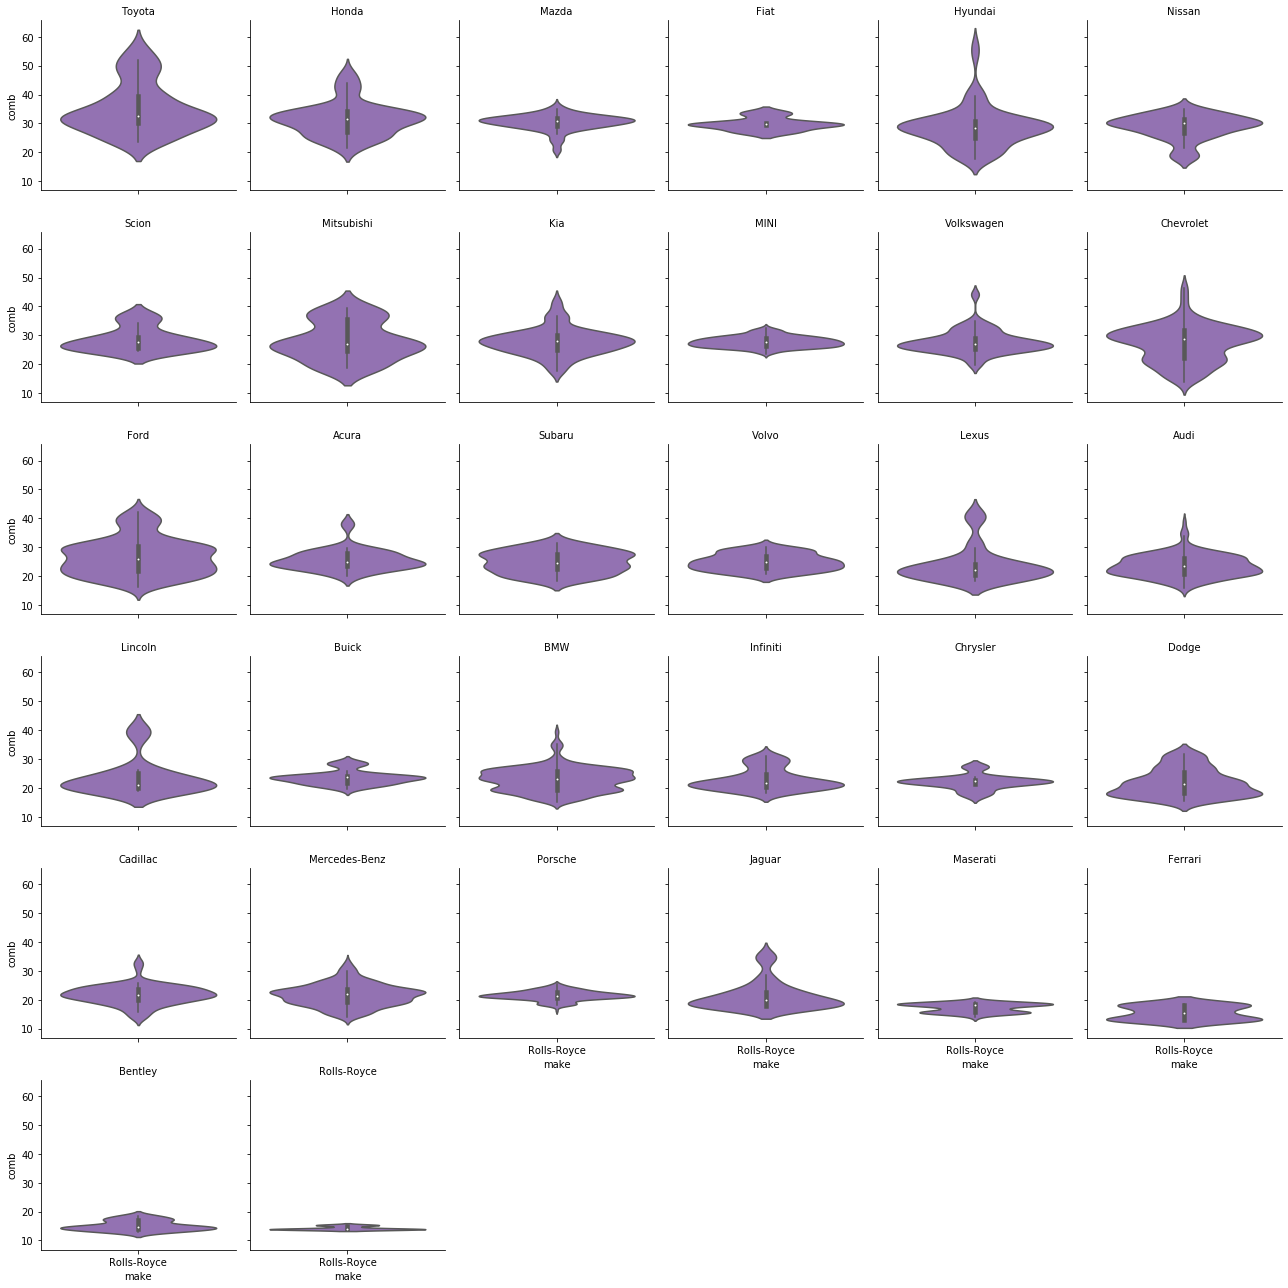

In [6]:
# create a facetGrid vioplot
# set the facet by group 'make' means
group_means = fuel_econ1.groupby(['make']).mean()
group_orders = group_means.comb.sort_values(ascending = False).index

# use sb FacetGrid to make facet plot
g = sb.FacetGrid(data = fuel_econ1, col = 'make', col_order = group_orders, col_wrap = 6, height = 3, sharey=True)

# use map method to apply the numerical variable 'comb'
sb_color = sb.color_palette()[4]
g.map(sb.violinplot, 'make', 'comb', color=sb_color)
g.set_titles('{col_name}');

Due to the large number of manufacturers to plot, I've gone with a faceted plot of histograms rather than a single figure like a box plot. As part of setting up the FacetGrid object, I have sorted the manufacturers by average mileage, and wrapped the faceting into a six column by three row grid. One interesting thing to note is that there are a very large number of BMW cars in the data, almost twice as many as the second-most prominent maker, Mercedes-Benz. One possible refinement could be to change the axes to be in terms of relative frequency or density to normalize the axes, making the less-frequent manufacturers easier to read.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


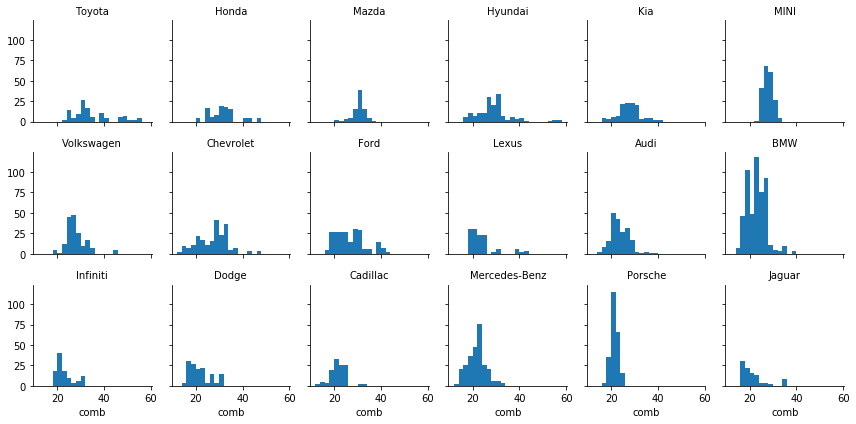

In [7]:
# run this cell to check your work against ours
additionalplot_solution_1()

**Task 2**: Continuing on from the previous task, plot the mean fuel efficiency for each manufacturer with at least 80 cars in the dataset.

In [8]:
fuel_econ1.make.value_counts().tail(14).index

Index(['Nissan', 'Buick', 'Subaru', 'Chrysler', 'Lincoln', 'Volvo', 'Acura',
       'Bentley', 'Mitsubishi', 'Rolls-Royce', 'Maserati', 'Scion', 'Fiat',
       'Ferrari'],
      dtype='object')

In [9]:
# remove makes less 80 cars
makeLess80 = ['Nissan', 'Buick', 'Subaru', 'Chrysler', 'Lincoln', 'Volvo', 'Acura',
       'Bentley', 'Mitsubishi', 'Rolls-Royce', 'Maserati', 'Scion', 'Fiat',
       'Ferrari']
# drop those makers
fuel_econ2 = fuel_econ1.query('make not in @makeLess80')

In [10]:
fuel_econ2.make.value_counts().tail()

Toyota      116
Infiniti    108
Honda       101
Jaguar       98
Mazda        87
Name: make, dtype: int64

(0.0, 45)

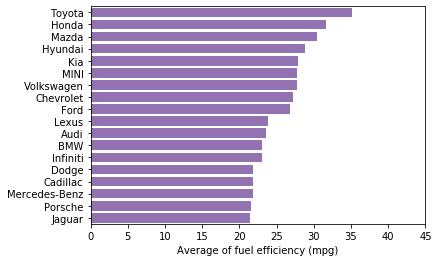

In [11]:
# calculate means of group
group2 = fuel_econ2.groupby(['make']).mean()

# sort the value and select the index value
group2_order = group2.sort_values(['comb'],ascending = False).index
group2_index = group2.index.values

# seaborn barplot
sb_color =sb.color_palette()[4]
sb.barplot(x = group2.comb, y = group2_index, color = sb_color,order = group2_order)
plt.xlabel('Average of fuel efficiency (mpg)')
plt.xlim(right =45) # change x-axis limit;

Seaborn's barplot function makes short work of this exercise. Since there are a lot of 'make' levels, I've made it a horizontal bar chart. In addition, I've set the error bars to represent the standard deviation of the car mileages.


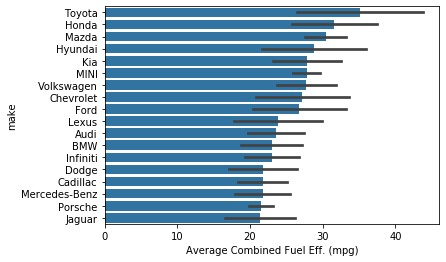

In [12]:
# run this cell to check your work against ours
additionalplot_solution_2()